In [1]:
import pandas as pd
from random import shuffle
from sklearn.linear_model import LinearRegression
import sys
sys.setrecursionlimit(1500)
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal

In [2]:
cpi = pd.read_csv('cpi.csv')
cpi = cpi.drop(columns = ['Unnamed: 0'])
cpi.head()

,year,quarter,value
0,2000,1,0.838
1,2000,2,0.890
2,2000,3,0.912
3,2000,4,0.843
4,2001,1,0.923


In [3]:
gni = pd.read_csv('gni.csv')
gni = gni.drop(columns = ['Unnamed: 0'])
gni.head()

,year,quarter,value
0,2000,1,0.612681
1,2000,2,0.612681
2,2000,3,0.612681
3,2000,4,0.612681
4,2001,1,0.229811


In [4]:
beef_stock_df = pd.read_csv('beef_stock.csv')
beef_stock_df = beef_stock_df.drop(columns = ['Unnamed: 0'])
beef_stock_df['ports'] = beef_stock_df['imports'] - beef_stock_df['exports']
beef_stock_df.head()

,year,month,commercial,farm,begin_stocks,end_stocks,imports,exports,population,ports
0,2000,1,6653.0,39.0,411.26084,494.86068,733.217,631.392,281304.0,101.825
1,2000,2,6699.0,16.0,494.86068,530.41420,814.282,605.960,282002.0,208.322
2,2000,3,6914.0,17.0,530.41420,529.87636,818.163,660.446,282769.0,157.717
3,2000,4,6511.0,39.0,529.87636,525.08088,666.711,570.602,283518.0,96.109
4,2001,1,6182.0,37.0,525.08088,433.52904,785.863,567.980,284169.0,217.883


In [5]:
for i in range(1,len(beef_stock_df.columns)+1):
    print((i,list(beef_stock_df.columns)[i-1]))

(1, 'year')
(2, 'month')
(3, 'commercial')
(4, 'farm')
(5, 'begin_stocks')
(6, 'end_stocks')
(7, 'imports')
(8, 'exports')
(9, 'population')
(10, 'ports')


In [6]:
pork_stock_df = pd.read_csv('pork_stock.csv')
pork_stock_df = pork_stock_df.drop(columns = ['Unnamed: 0'])
pork_stock_df['ports'] = pork_stock_df['imports'] - pork_stock_df['exports']
pork_stock_df.head()

,year,month,commercial,farm,begin_stocks,end_stocks,imports,exports,population,ports
0,2000,1,4834.0,7.0,461.0,568.0,245.543,323.85800,281304.0,-78.31500
1,2000,2,4478.0,5.0,568.0,513.0,239.093,306.74700,282002.0,-67.65400
2,2000,3,4606.0,5.0,513.0,460.0,233.527,305.48300,282769.0,-71.95600
3,2000,4,5010.0,7.0,460.0,453.0,247.325,350.57400,283518.0,-103.24900
4,2001,1,4805.0,7.0,453.0,466.0,226.691,394.62487,284169.0,-167.93387


In [7]:
lamb_stock_df = pd.read_csv('lamb_stock.csv')
lamb_stock_df = lamb_stock_df.drop(columns = ['Unnamed: 0'])
lamb_stock_df['ports'] = lamb_stock_df['imports'] - lamb_stock_df['exports']
lamb_stock_df.head()

,year,month,commercial,farm,begin_stocks,end_stocks,imports,exports,population,ports
0,2000,1,63.0,1.0,8.740,11.437,33.745366,1.587480,281304.0,32.157886
1,2000,2,57.0,1.0,11.437,13.984,32.913863,1.053226,282002.0,31.860637
2,2000,3,51.0,1.0,13.984,12.867,29.542076,0.942497,282769.0,28.599579
3,2000,4,59.0,1.0,12.867,13.455,33.342717,1.320010,283518.0,32.022707
4,2001,1,59.0,1.0,13.455,13.729,36.906515,1.775219,284169.0,35.131295


In [8]:
price_df = pd.read_csv('price.csv')
price_df = price_df.drop(columns = ['Unnamed: 0'])
price_df.head()

,year,quarter,beef_price,pork_price,lamb_price
0,2000,1,69.896667,41.139313,76.236667
1,2000,2,71.273333,50.423600,82.066667
2,2000,3,65.890000,46.429573,82.790000
3,2000,4,72.370000,40.776343,76.510000
4,2001,1,79.210000,42.830000,83.626667


In [9]:
#linear regression compute population
lr = LinearRegression()  
lr.fit([[i] for i in range(len(lamb_stock_df))], lamb_stock_df['population']) 
pop_b = lr.intercept_
pop_a = lr.coef_
print(pop_a,pop_b)

[638.26355232] 282292.5647260274


In [10]:
#This part is Professor Maksim code
class Flow(object):

    def __init__(self, name=None, rate=0, value=0):
        self.name = name
        self.rate = rate
        self.value = value

    def step(self):
        return(self.rate)
    
class LinearEQFlow1(Flow):
    
    def update_rate(self):
        self.rate = sum([a*x.value for (a, x) in self.dependencies])
        return(self.rate)

class LinearEQFlow2(Flow):
    
    def update_rate(self):
        self.rate = sum([a + x.value for (a, x) in self.dependencies])
        return(self.rate)
    
class LinearEQFlow3(Flow):
    
    def update_rate(self):
        self.rate = sum([a for (a, x) in self.dependencies])
        return(self.rate)

In [11]:
class RandomFlow(Flow):
    def update_rate(self):
        self.rate = normal(loc=0, scale = self.value*0.05)
        return(self.rate)

In [12]:
#This part is Professor Maksim code
class Stock(object):

    def __init__(self, name='Test', value=0.0, upper_limit=[], lower_limit=[], lst = []):
        self.name = name
        self.value = value
        self.upper_limit = upper_limit
        self.lower_limit = lower_limit
        self.in_flows = []
        self.out_flows = []
        self.lst = lst
        self.related_stocks = []

    def step(self, row = 0):
        total_inflow = sum([inf.step() for inf in self.in_flows])
        total_outflow = sum([outf.step() for outf in self.out_flows])
        self.value = self.value + total_inflow - total_outflow
       
        if row < len(self.upper_limit):
            if self.value > self.upper_limit[row]:
                self.value = self.value - 0.05 * self.value

        if row < len(self.lower_limit):
            if self.value < self.lower_limit[row]:
                self.value = self.value + 0.05 * self.value
            
        return self.value
    
    def step2(self):
        self.value = self.value + sum([i.value for i in self.related_stocks])
        return self.value + sum([i.value for i in self.related_stocks])
    
    def update(self, row):
        self.value = self.lst[row]
        self.lst = self.lst
        return self.value

In [13]:
#This part is Professor Maksim code
def Variable(object):
    value =0.0
    name = 'Var'

    def __init__(name=None, value = 0.0):
        self.name = name
        self.value = value

    def update_value(self):
        return(self.rate)

In [14]:
def price_change(lst):
    temp = [0]
    for i in range(len(lst)-1):
        temp.append(lst[i+1]-lst[i])
    return temp

In [15]:
corr_df = pd.DataFrame(columns=['year','quarter','beef_price','pork_price','lamb_price','beef_consume',\
                               'pork_consume','lamb_consume','beef_production','pork_production',\
                               'lamb_production','gni','cpi','population'])
corr_df[['year','quarter','beef_price','pork_price','lamb_price']] = price_df[['year','quarter','beef_price','pork_price','lamb_price']]
corr_df['beef_production'] = beef_stock_df['commercial'] + beef_stock_df['farm']
corr_df['pork_production'] = pork_stock_df['commercial'] + pork_stock_df['farm']
corr_df['lamb_production'] = lamb_stock_df['commercial'] + lamb_stock_df['farm']
corr_df['beef_consume'] = beef_stock_df['commercial'] + beef_stock_df['farm'] + beef_stock_df['imports'] + \
                        beef_stock_df['begin_stocks'] - beef_stock_df['exports'] - beef_stock_df['end_stocks']
corr_df['pork_consume'] = pork_stock_df['commercial'] + pork_stock_df['farm'] + pork_stock_df['imports'] + \
                        pork_stock_df['begin_stocks'] - pork_stock_df['exports'] - pork_stock_df['end_stocks']
corr_df['lamb_consume'] = lamb_stock_df['commercial'] + lamb_stock_df['farm'] + lamb_stock_df['imports'] + \
                        lamb_stock_df['begin_stocks'] - lamb_stock_df['exports'] - lamb_stock_df['end_stocks']
corr_df['cpi'] = cpi['value']
corr_df['gni'] = gni['value']
corr_df['bprice_change'] = price_change(list(corr_df['beef_price']))
corr_df['pprice_change'] = price_change(list(corr_df['pork_price']))
corr_df['lprice_change'] = price_change(list(corr_df['lamb_price']))
corr_df['population'] = lamb_stock_df['population']
corr_df.head()

,year,quarter,beef_price,pork_price,lamb_price,beef_consume,pork_consume,lamb_consume,beef_production,pork_production,lamb_production,gni,cpi,population,bprice_change,pprice_change,lprice_change
0,2000,1,69.896667,41.139313,76.236667,6710.22516,4655.68500,93.460886,6692.0,4841.0,64.0,0.612681,0.838,281304.0,0.000000,0.000000,0.000000
1,2000,2,71.273333,50.423600,82.066667,6887.76848,4470.34600,87.313637,6715.0,4483.0,58.0,0.612681,0.890,282002.0,1.376667,9.284287,5.830000
2,2000,3,65.890000,46.429573,82.790000,7089.25484,4592.04400,81.716579,6931.0,4611.0,52.0,0.612681,0.912,282769.0,-5.383333,-3.994027,0.723333
3,2000,4,72.370000,40.776343,76.510000,6650.90448,4920.75100,91.434707,6550.0,5017.0,60.0,0.612681,0.843,283518.0,6.480000,-5.653230,-6.280000
4,2001,1,79.210000,42.830000,83.626667,6528.43484,4631.06613,94.857295,6219.0,4812.0,60.0,0.229811,0.923,284169.0,6.840000,2.053657,7.116667


In [16]:
for i in range(1,len(corr_df.columns)+1):
    print((i,list(corr_df.columns)[i-1]))

(1, 'year')
(2, 'quarter')
(3, 'beef_price')
(4, 'pork_price')
(5, 'lamb_price')
(6, 'beef_consume')
(7, 'pork_consume')
(8, 'lamb_consume')
(9, 'beef_production')
(10, 'pork_production')
(11, 'lamb_production')
(12, 'gni')
(13, 'cpi')
(14, 'population')
(15, 'bprice_change')
(16, 'pprice_change')
(17, 'lprice_change')


In [17]:
#initial Stocks
beef_price = Stock(name = 'beef_price', lower_limit=[i*0.95 for i in list(corr_df['beef_price'])], \
                   upper_limit=[i*1.05 for i in list(corr_df['beef_price'])])
beef_price.value = price_df.iloc[0,2]
pork_price = Stock(name = 'pork_price', lower_limit=[i*0.95 for i in list(corr_df['pork_price'])], \
                   upper_limit=[i*1.05 for i in list(corr_df['pork_price'])])
pork_price.value = price_df.iloc[0,3]
lamb_price = Stock(name = 'lamb_price', lower_limit=[i*0.95 for i in list(corr_df['lamb_price'])], \
                   upper_limit=[i*1.05 for i in list(corr_df['lamb_price'])])
lamb_price.value = price_df.iloc[0,4]

beef_stock = Stock(name = 'beef_stock', lst = list(beef_stock_df['begin_stocks']))
beef_stock.value = beef_stock_df.iloc[0,4]
pork_stock = Stock(name = 'pork_stock', lst = list(pork_stock_df['begin_stocks']))
pork_stock.value = pork_stock_df.iloc[0,4]
lamb_stock = Stock(name = 'lamb_stock', lst = list(lamb_stock_df['begin_stocks']))
lamb_stock.value = lamb_stock_df.iloc[0,4]

beef_end_stock = Stock(name = 'beef_end_stock', lst = list(beef_stock_df['end_stocks']))
beef_end_stock.value = beef_stock_df.iloc[0,5]
pork_end_stock = Stock(name = 'pork_end_stock', lst = list(pork_stock_df['end_stocks']))
pork_end_stock.value = pork_stock_df.iloc[0,5]
lamb_end_stock = Stock(name = 'lamb_end_stock', lst = list(lamb_stock_df['end_stocks']))
lamb_end_stock.value = lamb_stock_df.iloc[0,5]

beef_production = Stock(name = 'beef_production', lst = list(corr_df['beef_production']))
beef_production.value = beef_stock_df.iloc[0,2] + beef_stock_df.iloc[0,3]
pork_production = Stock(name = 'pork_production', lst = list(corr_df['pork_production']))
pork_production.value = pork_stock_df.iloc[0,2] + pork_stock_df.iloc[0,3]
lamb_production = Stock(name = 'lamb_production', lst = list(corr_df['lamb_production']))
lamb_production.value = lamb_stock_df.iloc[0,2] + lamb_stock_df.iloc[0,3]

beef_port = Stock(name = 'beef_port', lst = list(beef_stock_df['ports']))
beef_port.value = beef_stock_df.iloc[0,6] - beef_stock_df.iloc[0,7]
pork_port = Stock(name = 'pork_port', lst = list(pork_stock_df['ports']))
pork_port.value = pork_stock_df.iloc[0,6] - pork_stock_df.iloc[0,7]
lamb_port = Stock(name = 'lamb_port', lst = list(lamb_stock_df['ports']))
lamb_port.value = lamb_stock_df.iloc[0,6] - lamb_stock_df.iloc[0,7]

beef_consume = Stock(name = 'beef_consume')
beef_consume.value = corr_df.iloc[0,5]
pork_consume = Stock(name = 'pork_consume')
pork_consume.value = corr_df.iloc[0,6]
lamb_consume = Stock(name = 'lamb_consume')
lamb_consume.value = corr_df.iloc[0,7]

beef_change = Stock(name = 'beef_change')
beef_change.value = 0
pork_change = Stock(name = 'pork_change')
pork_change.value = 0
lamb_change = Stock(name = 'lamb_change')
lamb_change.value = 0

population = Stock(name = 'population', lst = list(corr_df['population']))
population.value = corr_df['population'][0]

cpi = Stock(name='cpi', lst = list(corr_df['cpi']))
cpi.value = corr_df['cpi'][0]

gni = Stock(name='gni', lst = list(corr_df['gni']))
cpi.value = corr_df['gni'][0]

population_change = Stock(name = 'pop_change')
population_change.value = 638

In [18]:
#initial Flows
beef_con = LinearEQFlow1(name='beef_con', rate = -40)
beef_con.dependencies = [(1,beef_production),(1,beef_port),(1,beef_stock),(-1,beef_end_stock),(-1,beef_consume)]
beef_consume.in_flows.append(beef_con)

pork_con = LinearEQFlow1(name='pork_con', rate = 180)
pork_con.dependencies = [(1,pork_production),(1,pork_port),(1,pork_stock),(-1,pork_end_stock),(-1,pork_consume)]
pork_consume.in_flows.append(pork_con)

lamb_con = LinearEQFlow1(name='lamb_con', rate = -6)
lamb_con.dependencies = [(1,lamb_production),(1,lamb_port),(1,lamb_stock),(-1,lamb_end_stock),(-1,lamb_consume)]
lamb_consume.in_flows.append(lamb_con)

#pop_inc = LinearEQFlow3(name='population_increase', rate = 2394.71603896)
#pop_inc.dependencies = [(2394.71603896,population)]
#population.in_flows.append(pop_inc)

#Substitution Effect
'''
beef_sub = LinearEQFlow1(name='beef_substitution', rate = 0)
beef_sub.dependencies = [(1,pork_change),(1,lamb_change)]
beef_price.in_flows.append(beef_sub)

pork_sub = LinearEQFlow1(name='pork_substitution', rate = 0)
pork_sub.dependencies = [(1,beef_change),(1,lamb_change)]
pork_price.in_flows.append(pork_sub)

lamb_sub = LinearEQFlow1(name='lamb_substitution', rate = 0)
lamb_sub.dependencies = [(1,beef_change),(1,pork_change)]
lamb_price.in_flows.append(lamb_sub)
'''

k = -0.0015
beef_price_change = LinearEQFlow1(name ='beef_price_change', rate=0.67)
beef_price_change.dependencies = [(0.0001, beef_price), (0.0001, pork_price), (0.0001, lamb_price), \
                                 (0.00001, beef_consume), (0.000001, pork_consume), (0.0001,lamb_consume), \
                                 (-0.00001, beef_production), (-0.000001, pork_production), (-0.0001, lamb_production), \
                                 (-0.01, gni), (0.008, cpi), (k, pork_change) ,(k, lamb_change), \
                                 (0.000001, population_change)]
beef_change.in_flows.append(beef_price_change)
pork_price_change = LinearEQFlow1(name = 'pork_price_change', rate=0.05)
pork_price_change.dependencies = [(0.00001, beef_price), (0.00001, pork_price), (0.00001, lamb_price), \
                                 (0.000001, beef_consume), (0.00001, pork_consume), (0.0001,lamb_consume), \
                                 (-0.000001, beef_production), (-0.00001, pork_production), (-0.0001, lamb_production), \
                                 (-0.01, gni), (0.01, cpi), (k, beef_change) ,(k, lamb_change), \
                                 (0.000001, population_change)]
pork_change.in_flows.append(pork_price_change)
lamb_price_change = LinearEQFlow1(name = 'lamb_price_change', rate=0.77)
lamb_price_change.dependencies = [(0.00001, beef_price), (0.00001, pork_price), (0.0001, lamb_price), \
                                 (0.000001, beef_consume), (0.000001, pork_consume), (0.001,lamb_consume), \
                                 (-0.000001, beef_production), (-0.000001, pork_production), (-0.001, lamb_production), \
                                 (-0.01, gni), (0.008, cpi), (k, pork_change) ,(k, beef_change), \
                                 (0.000001, population_change)]
lamb_change.in_flows.append(lamb_price_change)

beef_price.related_stocks.append(beef_change)
pork_price.related_stocks.append(pork_change)
lamb_price.related_stocks.append(lamb_change)

beef_price_random = RandomFlow(name='beef_random', rate = 0, value = beef_price.value)
beef_price.out_flows.append(beef_price_random)
pork_price_random = RandomFlow(name='pork_random', rate = 0, value = pork_price.value)
pork_price.out_flows.append(pork_price_random)
lamb_price_random = RandomFlow(name='lamb_random', rate = 0, value = lamb_price.value)
lamb_price.out_flows.append(lamb_price_random)

In [19]:
stocks = [beef_price, pork_price, lamb_price, beef_stock, pork_stock, lamb_stock, \
         beef_end_stock, pork_end_stock, lamb_end_stock, beef_production, pork_production, \
         lamb_production, beef_port, pork_port, lamb_port, beef_consume, pork_consume, \
         lamb_consume, beef_change, pork_change, lamb_change, population]
flows = [beef_con, pork_con, lamb_con, pork_price_change, \
        beef_price_change, lamb_price_change, beef_price_random, \
        pork_price_random, lamb_price_random]
updates = [beef_stock, pork_stock, lamb_stock, beef_end_stock, pork_end_stock, lamb_end_stock, \
          beef_port, pork_port, lamb_port, population, beef_production, pork_production, lamb_production, \
          gni, cpi]
step2 = [beef_price, pork_price, lamb_price]

In [20]:
result = pd.DataFrame()
def main_f(num):
    ### Gather. data
    global result
    values = {s.name:s.value for s in stocks}
    flow_values = {f.name:f.rate for f in flows}
    values.update(flow_values)
    result = result.append(values,ignore_index=True)
    try:
        [s.update(num) for s in updates]
        [f.update_rate() for f in flows]
        [s.step(num) for s in stocks]
        [s.step2() for s in step2]
    except Exception as e:
        ### a thrown exception stops the run
        print(str(e))
        print("simulation done")

for i in range(1,73):
    main_f(i)

list index out of range
simulation done


In [21]:
result

,beef_change,beef_con,beef_consume,beef_end_stock,beef_port,beef_price,beef_price_change,beef_production,beef_random,beef_stock,...,pork_change,pork_con,pork_consume,pork_end_stock,pork_port,pork_price,pork_price_change,pork_production,pork_random,pork_stock
0,0.000000,-40.00000,6710.22516,494.86068,101.825,69.896667,0.670000,6692.0000,0.000000,411.26084,...,0.000000,180.00000,4655.68500,568.0000,-78.31500,41.139313,0.050000,4841.0000,0.000000,461.0000
1,0.024029,177.54332,6887.76848,530.41420,208.322,69.077955,0.024029,6715.0000,4.131024,494.86068,...,0.010552,-185.33900,4470.34600,513.0000,-67.65400,43.619204,0.010552,4483.0000,-0.392736,568.0000
2,0.047812,201.48636,7089.25484,529.87636,157.717,68.786914,0.023782,6931.0000,0.338852,530.41420,...,0.018070,121.69800,4592.04400,460.0000,-71.95600,43.280709,0.007518,4611.0000,2.416691,513.0000
3,0.075558,-438.35036,6650.90448,525.08088,96.109,71.571052,0.027746,6550.0000,0.695967,529.87636,...,0.021215,328.70700,4920.75100,453.0000,-103.24900,42.750524,0.003145,5017.0000,0.551399,460.0000
4,0.108105,-122.46964,6528.43484,433.52904,217.883,74.067379,0.032548,6219.0000,1.133648,525.08088,...,0.035095,-289.68487,4631.06613,466.0000,-167.93387,42.329075,0.013880,4812.0000,2.470542,453.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2.441448,-14.97350,6482.02970,756.69220,-102.208,129.697521,0.041422,6649.9395,1.190829,690.99040,...,0.419350,591.64300,5657.01970,507.1261,-1181.69800,54.323935,-0.001249,6652.3908,2.342171,693.4530
68,2.481557,32.18380,6514.21350,616.12690,46.960,130.614878,0.040109,6326.6882,1.564201,756.69220,...,0.422296,-482.08030,5174.93940,578.0583,-1168.22900,52.268639,0.002945,6414.1006,2.477592,507.1261
69,2.523260,95.07450,6609.28800,553.44290,132.033,135.351322,0.041703,6414.5710,-2.213184,616.12690,...,0.424882,-221.33450,4953.60490,620.2511,-1144.22300,53.661689,0.002587,6140.0207,-3.770106,578.0583
70,2.561117,95.96390,6705.25190,659.61300,68.051,128.431302,0.037857,6743.3710,2.856390,553.44290,...,0.421446,268.25540,5221.86030,694.6695,-946.74200,55.647630,-0.003437,6243.0207,1.065323,620.2511


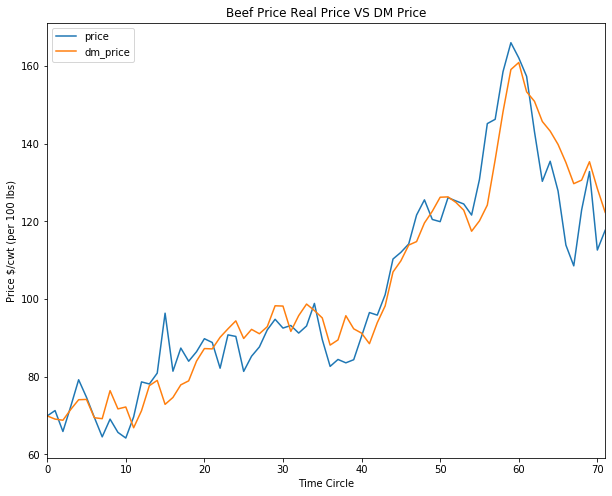

In [23]:
df_result = pd.DataFrame(columns=['price', 'dm_price'])
df_result['price'] = price_df['beef_price']
df_result['dm_price'] = result['beef_price']
ax = df_result.plot(figsize = (10,8), title = 'Beef Price Real Price VS DM Price')
ax.set_xlabel('Time Circle')
ax.set_ylabel('Price $/cwt (per 100 lbs)')
plt.savefig('beef.png')

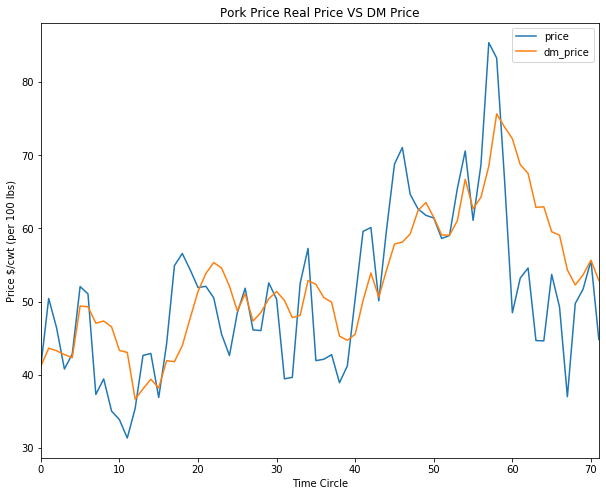

In [24]:
df_result = pd.DataFrame(columns=['price', 'dm_price'])
df_result['price'] = price_df['pork_price']
df_result['dm_price'] = result['pork_price']
ax = df_result.plot(figsize = (10,8), title = 'Pork Price Real Price VS DM Price')
ax.set_xlabel('Time Circle')
ax.set_ylabel('Price $/cwt (per 100 lbs)')
plt.savefig('pork.png')

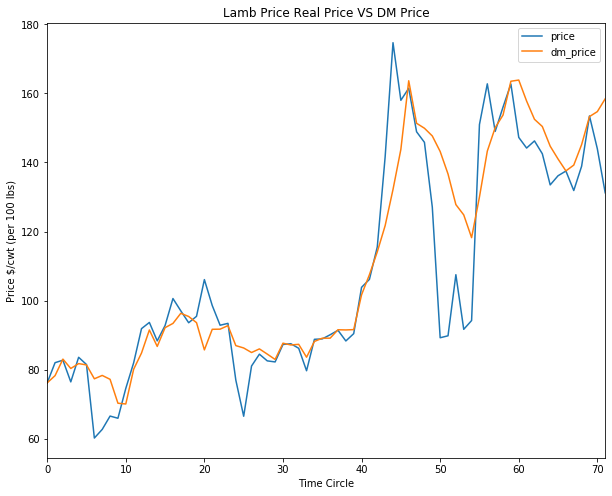

In [25]:
df_result = pd.DataFrame(columns=['price', 'dm_price'])
df_result['price'] = price_df['lamb_price']
df_result['dm_price'] = result['lamb_price']
ax = df_result.plot(figsize = (10,8), title = 'Lamb Price Real Price VS DM Price')
ax.set_xlabel('Time Circle')
ax.set_ylabel('Price $/cwt (per 100 lbs)')
plt.savefig('lamb.png')